# Autoencoders

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Hyperparameters

In [4]:
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 
num_outputs = num_inputs

learning_rate = 0.01

### Placeholder

In [5]:
X = tf.placeholder(tf.float32,shape = [None,num_inputs],name = "X")

### Weights and Biases

In [36]:
initializer = tf.truncated_normal_initializer(stddev = np.sqrt(2 / num_inputs)) 

In [37]:
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),name = "weights1",dtype = tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),name = "weights2",dtype = tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),name = "weights3",dtype = tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),name = "weights4",dtype = tf.float32)

In [38]:
b1 = tf.Variable(tf.zeros([neurons_hid1]),name = "bias1")
b2 = tf.Variable(tf.zeros([neurons_hid2]),name = "bias2")
b3 = tf.Variable(tf.zeros([neurons_hid3]),name = "bias3")
b4 = tf.Variable(tf.zeros([num_outputs]),name = "bias4")

### Activation Function

In [39]:
relu = tf.nn.relu

### Layers

In [40]:
hidden_layer_1 = relu(tf.matmul(X,w1) + b1) 
hidden_layer_2 = relu(tf.matmul(hidden_layer_1,w2) + b2) 
hidden_layer_3 = relu(tf.matmul(hidden_layer_2,w3) + b3) 
output_layer = relu(tf.matmul(hidden_layer_3,w4) + b4) 

### Loss Funtion

In [41]:
loss = tf.reduce_mean(tf.square(X - output_layer))

### Optimizer

In [42]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [43]:
train = optimizer.minimize(loss)

### GPU Configutaion

In [44]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

### Initialize Variables

In [45]:
init = tf.global_variables_initializer()

In [46]:
saver = tf.train.Saver() 

In [51]:
%%time
num_epochs = 5
batch_size = 128

with tf.Session(config = config) as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            X_batch,Y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict = {X:X_batch})
            
        training_loss = loss.eval(feed_dict = {X:X_batch})
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")     

Epoch 0 Complete. Training Loss: 0.03874863311648369
Epoch 1 Complete. Training Loss: 0.03733516484498978
Epoch 2 Complete. Training Loss: 0.03306947275996208
Epoch 3 Complete. Training Loss: 0.03269067406654358
Epoch 4 Complete. Training Loss: 0.03270110860466957
Wall time: 7.11 s


### Test Autoencoder on the Test Set

In [52]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


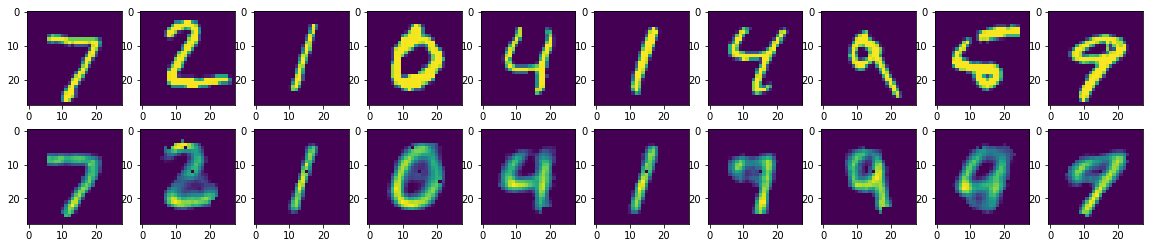

In [53]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

### Dimenisonality Reduction

In [56]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = hidden_layer_2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


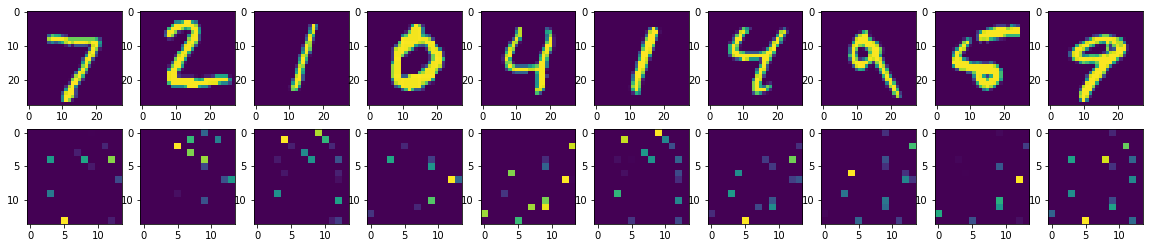

In [59]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (14, 14)))